In [1]:
import copy
import random
import re

import pandas
import numpy

from curve_fits import Call

from curve_fits import fits
from curve_fits import frames

In [2]:
def random_ints_sample(size, max_abs=10000):
    return random.sample(range(-max_abs, max_abs), k=size)

In [3]:
size_range = range(1050, 1750)
overfit = 1  # HIGH to differentiate from single-line shape
init_calls = [Call('set', random_ints_sample(size)) for size in size_range]
profile = frames.TimeComplexityProfile(init_calls, Call('copy'), Call('pop'),
    index=pandas.Index(size_range, name='List length'), overfit=overfit, fraction=0.9, loops=100)

In [4]:
profile.fit_all_with(Call('polynomial', 1), Call('polynomial_stair', [1], [[x] for x in range(1300, 1420)]))

In [5]:
profile.best_fits(limit=3)

kind  \
key  cost                                 
copy 0.011634  PW:Poly(1)-[1365]Poly(1)   
     0.012061  PW:Poly(1)-[1366]Poly(1)   
     0.012878  PW:Poly(1)-[1362]Poly(1)   
pop  0.008261  PW:Poly(1)-[1365]Poly(1)   
     0.008312  PW:Poly(1)-[1366]Poly(1)   
     0.008467  PW:Poly(1)-[1364]Poly(1)   

                                                             fit DOF  
key  cost                                                             
copy 0.011634  (0.0144 ± 0.0029) + (0.0000558 ± 0.0000024)x |...   4  
     0.012061  (0.0110 ± 0.0033) + (0.0000587 ± 0.0000028)x |...   4  
     0.012878  (0.0154 ± 0.0027) + (0.0000549 ± 0.0000023)x |...   4  
pop  0.008261  (-0.0178 ± 0.0032) + (0.0000599 ± 0.0000026)x ...   4  
     0.008312  (-0.0187 ± 0.0033) + (0.0000606 ± 0.0000027)x ...   4  
     0.008467  (-0.0176 ± 0.0031) + (0.0000596 ± 0.0000025)x ...   4

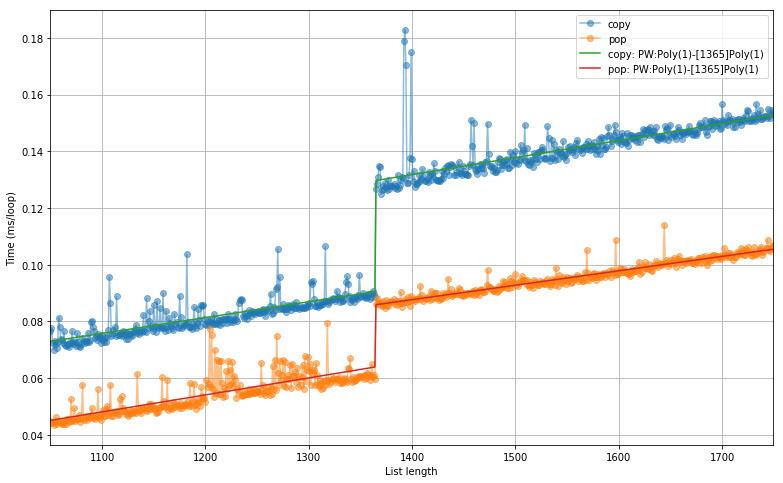

In [6]:
profile.plot(limit=1)

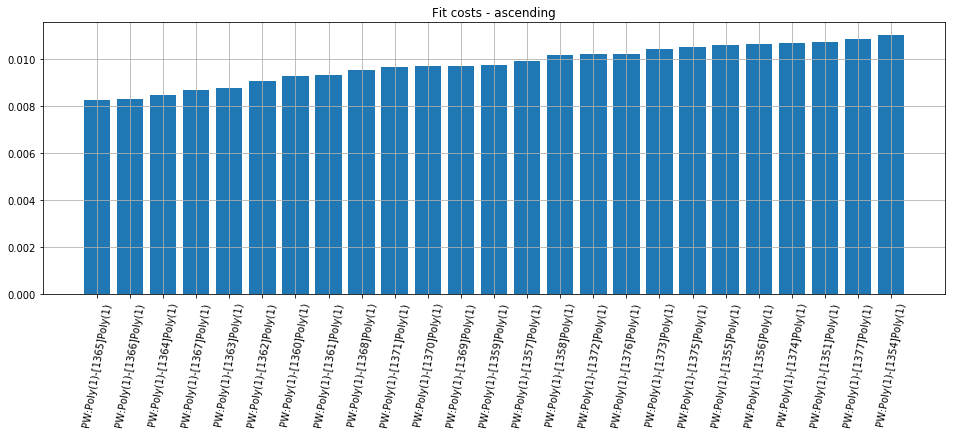

In [7]:
profile.plot_costs('pop', limit=25, rotation=80)

In [8]:
pop_fit = profile.best_fit('pop')
pop_fit

<PiecewiseFit: (-0.0178 ± 0.0032) + (0.0000599 ± 0.0000026)x | (0.0165 ± 0.0011) + (0.00005088 ± 7.1E-7)x>

In [9]:
pop_fit.fits, pop_fit.jumps_at

((<PolynomialFit: (-0.0178 ± 0.0032) + (0.0000599 ± 0.0000026)x>,
  <PolynomialFit: (0.0165 ± 0.0011) + (0.00005088 ± 7.1E-7)x>),
 (1365,))

In [10]:
pop_fit.fits[1].measures

(<Measure: 0.0165 ± 0.0011>, <Measure: 0.00005088 ± 7.1E-7>)

In [11]:
pop_fit_copy = copy.deepcopy(pop_fit)
pop_fit_copy.series = None   # Mocked to show equality is not affected
assert pop_fit == copy.deepcopy(pop_fit)

In [12]:
assert pop_fit != fits.PiecewiseFit(profile.data['pop'], 1, pop_fit.jumps_at, fits.PolynomialFit)

In [13]:
assert [re.sub(r'\[[0-9]{3,}\]', '', kind) for kind in profile.best_fits(limit=1)['kind']] == [
    'PW:Poly(1)-Poly(1)', 'PW:Poly(1)-Poly(1)']